# Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

<ipython-input-5-db8a292283db>:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
<ipython-input-5-db8a292283db>:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


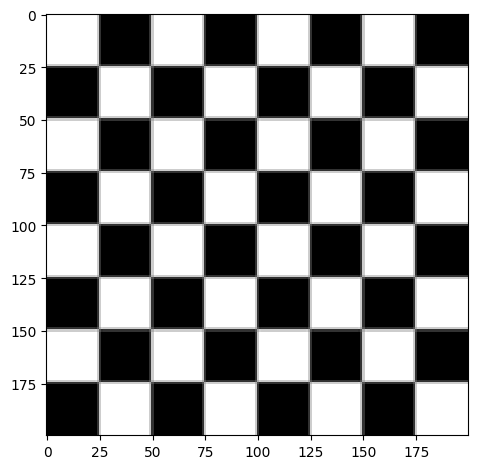

In [5]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

I = sk.data.checkerboard() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1)) # reshape image as NPIX x NCHANNELS array

sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

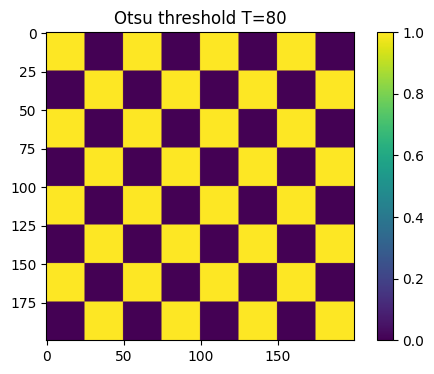

In [6]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

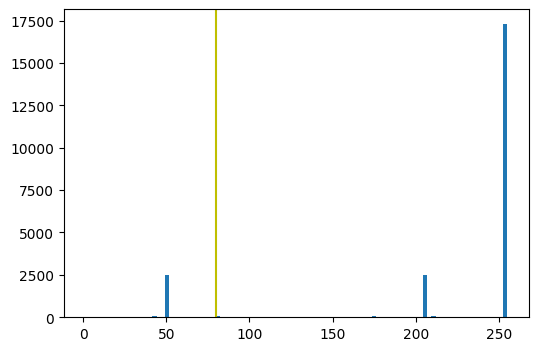

In [7]:
flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.axvline(thresh,color='y')
plt.show()

Comment: The Otsu Threshold method splits the pixels of the image with T=80, seperating the almost black fields of the checkerboard of the original image from the white fields as well as the blurry light grey edges in between the fields. The result is a optimized image of the checkerboard.

# Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

The shape of the image array I is: (200, 200)
Here N = 40000 and d = 1
The shape of the array should be 40000 x 1


<ipython-input-24-fd491795a2c8>:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
<ipython-input-24-fd491795a2c8>:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


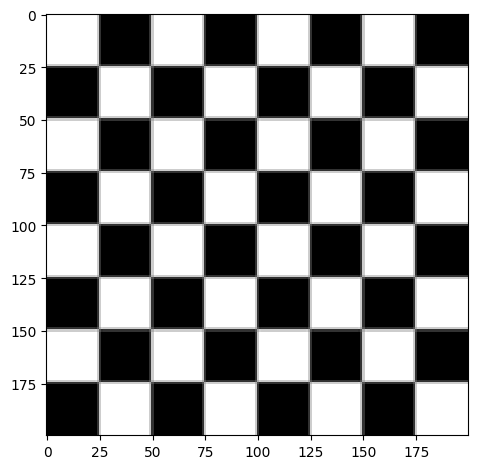

In [24]:
import skimage as sk
import numpy as np

I = sk.data.checkerboard() # load grayscale image
print(f"The shape of the image array I is: {I.shape}")

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1], I.shape[1] if len(I.shape) > 2 else 1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1], I.shape[1] if len(I.shape) > 2 else 1))

v_I = np.reshape(I,(I.shape[0]*I.shape[1], I.shape[1] if len(I.shape) > 2 else 1)) # reshape image as NPIX x NCHANNELS array
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

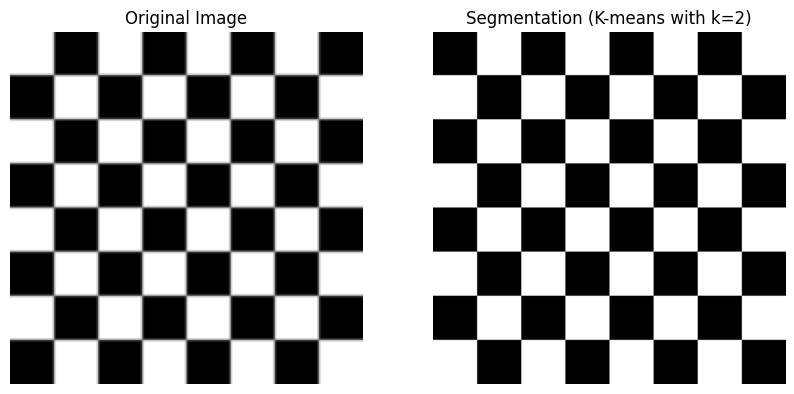

In [25]:
#With two clusters

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

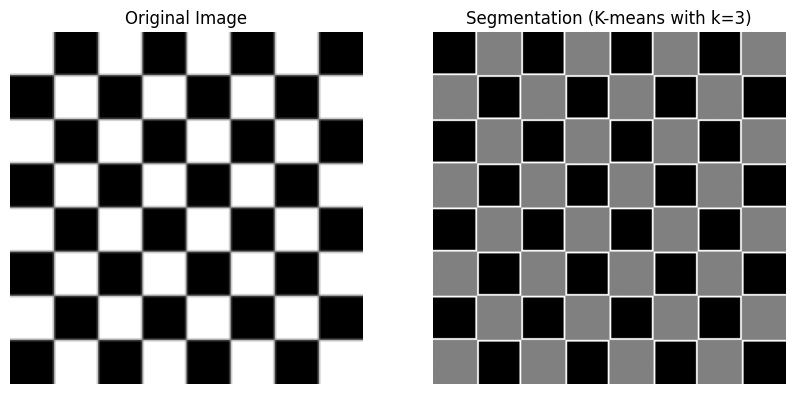

In [26]:
#With three clusters

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 3
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

As to assume for this image with little color variations, the n=2 cluster kmean performs very similar so the Otsu threshold method, splitting black and white fields. Repeating the same with n=3 clusters, the grey areas in between the fields get put into their own group additionally. Depending on the task of segmentation, Otsu or n=2 are the right choice, when it comes to sharpening the image for example. If the goal is to visualize the different colors in the image clearer, n=3 would be better suited.

# Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Link to shared folder: https://drive.google.com/drive/folders/1_okoc_i2i2vkbtFo_T_a-msfsAgK4nIP?usp=sharing

import os
shared_folder_path = '/content/drive/MyDrive/Computer Vision Benedict/'
if os.path.exists(shared_folder_path):
    files = os.listdir(shared_folder_path)
    print("Files in the shared folder:")
    for file in files:
        print(file)
else:
    print(f"The path '{shared_folder_path}' does not exist. Make sure the path is correct.")

Files in the shared folder:
test.jpg
training.jpg


In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

#Lets produce the Ground truth training and test images with a KNN
I_train_colored = sk.io.imread(os.path.join(shared_folder_path,'training.jpg'))
I_train = sk.color.rgb2gray(I_train_colored)

I_test_colored = sk.io.imread(os.path.join(shared_folder_path,'test.jpg'))
I_test = sk.color.rgb2gray(I_test_colored)

v_Itrain = np.reshape(I_train,(I_train.shape[0]*I_train.shape[1], II_train.shape[1] if len(I_train.shape) > 2 else 1)) # reshape image as NPIX x NCHANNELS array
v_Itest = np.reshape(I_test,(I_test.shape[0]*I_test.shape[1], II_test.shape[1] if len(I_test.shape) > 2 else 1)) # reshape image as NPIX x NCHANNELS array

#With two clusters

# Fit a Kmeans clustering model with two clusters:
n_clus = 2

#For the test image
kmeans_test = KMeans(n_clusters=n_clus, random_state=0).fit(v_Itest)
v_kmeans_test = kmeans_test.predict(v_Itest)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans_test = np.reshape(v_kmeans_test,(I_test.shape[0],I_test.shape[1])) # reshape back to original image size
# Shape back result as image

#For the training image
kmeans_train = KMeans(n_clusters=n_clus, random_state=0).fit(v_Itrain)
v_kmeans_train = kmeans_test.predict(v_Itrain)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans_train = np.reshape(v_kmeans_train,(I_train.shape[0],I_train.shape[1])) # reshape back to original image size
# Shape back result as image

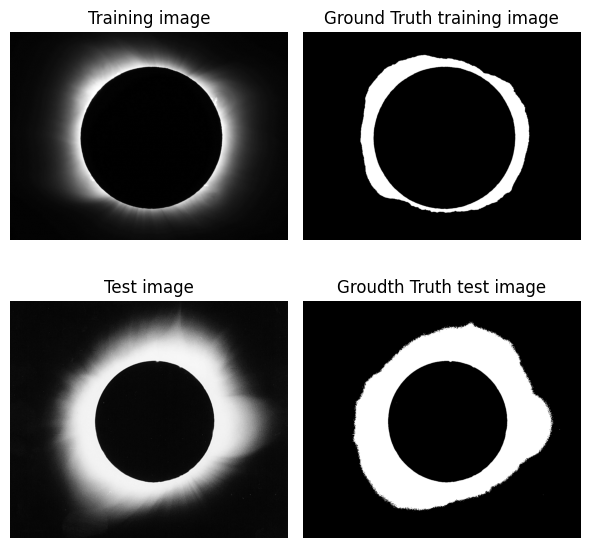

In [33]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
import os
from matplotlib import gridspec

I_train = I_train
I_train_GT = I_kmeans_train
I_test = I_test
I_test_GT = I_kmeans_test

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(I_test, cmap=plt.cm.gray)
ax2.set_title('Test image')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(I_test_GT, cmap=plt.cm.gray)
ax3.set_title('Groudth Truth test image')
ax3.set_axis_off()

plt.tight_layout()
plt.show()

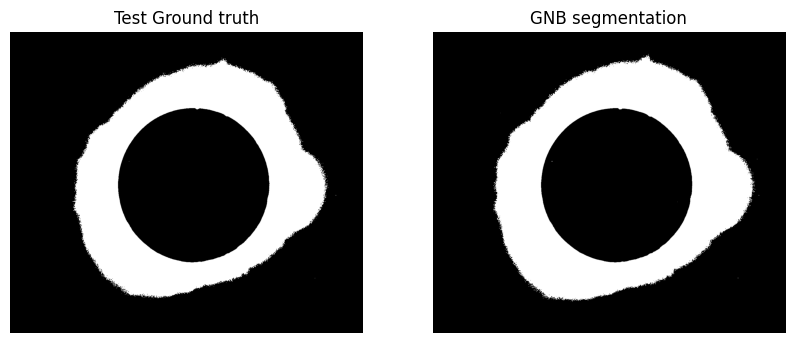

In [35]:
from sklearn.naive_bayes import GaussianNB

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool)

gnb_model = GaussianNB()
gnb_model.fit(v_Itrain, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_gnb = gnb_model.predict(v_Itest)
I_gnb = np.array(v_gnb).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_gnb, cmap=plt.cm.gray)
ax[1].set_title('GNB segmentation')
ax[1].set_axis_off()

plt.show()

Comment: In this case good results with minimal differences were achieved by the supervised approach. Since the training example was very similar to the test example, the training data was sufficient, but in more complicated cases, a single training image would not be nearly sufficient.

# Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.